In [1]:
# importing the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [4]:
tracks = pd.read_csv("tracks.csv")

In [7]:
tracks_w_clusters = pd.read_csv("../../final_track_clusters.csv")
tracks_w_clusters_over_30 = tracks_w_clusters.loc[tracks_w_clusters['popularity']>30]

In [8]:
tracks_w_clusters_over_30.to_csv("final_track_clusters2.csv")

In [5]:
tracks['Year'] = tracks.release_date.map(lambda date: int(date[:4]))

In [6]:
key_dummies = pd.get_dummies(tracks["key"], prefix= 'key')

In [7]:
dummy_columns = tracks.join(key_dummies)

In [9]:
# X = dummy_columns[dummy_columns.columns[8:]].drop(columns = ['key', 'time_signature'])
# X

In [11]:
X_new = dummy_columns.drop(columns=["key_0", "key_1", "key_2", "key_3", "key_4", "key_5", "key_6", "key_7", "key_8", "key_9", "key_10", "key_11"])

In [13]:
# unique values
print("\nUNIQUE VALUES:")
print(dummy_columns.nunique().sort_values())


UNIQUE VALUES:
key_11                   2
key_0                    2
key_3                    2
key_10                   2
key_4                    2
key_5                    2
key_1                    2
key_6                    2
mode                     2
key_7                    2
key_8                    2
key_9                    2
explicit                 2
key_2                    2
key                     12
Year                   101
popularity             101
danceability          1285
speechiness           1655
liveness              1782
valence               1805
energy                2571
acousticness          5217
instrumentalness      5402
release_date         19700
loudness             29196
artists             114030
tempo               122706
name                446456
dtype: int64


In [14]:
X_new

,name,popularity,explicit,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Year
0,Carve,6,0,['Uli'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,1922
1,Capítulo 2.16 - Banquero Anarquista,0,0,['Fernando Pessoa'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1922
2,Vivo para Quererte - Remasterizado,0,0,['Ignacio Corsini'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,1922
3,El Prisionero - Remasterizado,0,0,['Ignacio Corsini'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,1922
4,Lady of the Evening,0,0,['Dick Haymes'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,1922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,云与海,50,0,['阿YueYue'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,2020
586668,blind,72,0,['ROLE MODEL'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,2020
586669,What They'll Say About Us,70,0,['FINNEAS'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,2020
586670,A Day At A Time,58,0,"['Gentle Bones', 'Clara Benin']",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,2021


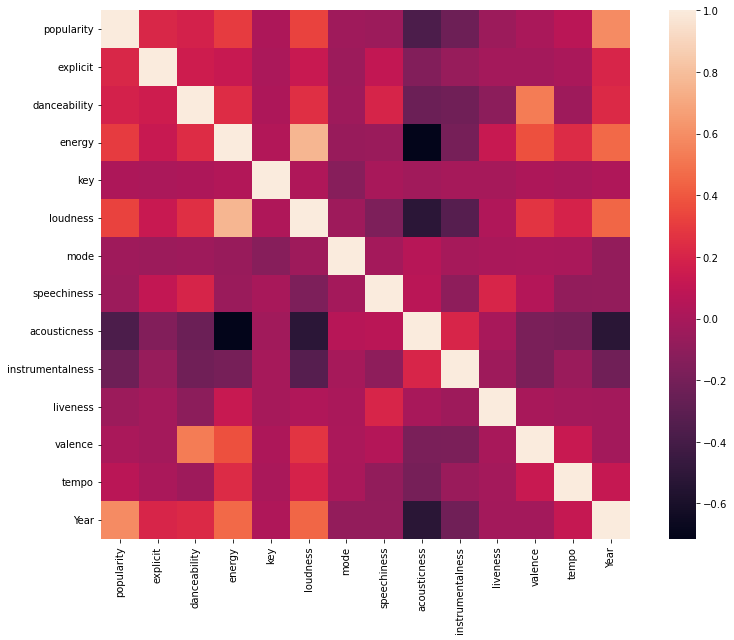

In [15]:
# creating a correlation matrix
corr = X_new.corr()

# plotting the heatmap
f, ax = plt.subplots(figsize=(12,9))

sns.heatmap(corr, square=True, linecolor='white', vmax=1.0, annot=False,);
plt.tight_layout()

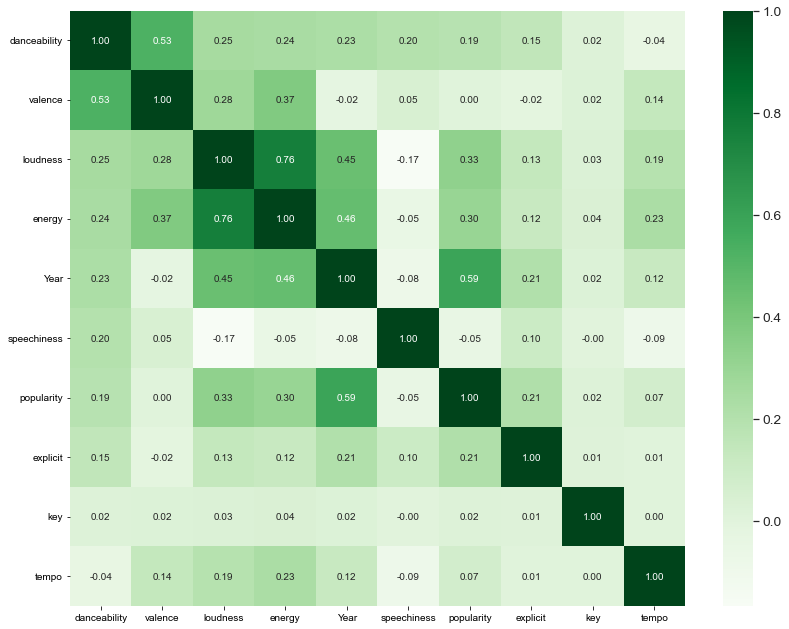

In [16]:
# focused heatmap - Popularity
# number of variables to be selected
k = 10

# finding the most correlated variables
cols = corr.nlargest(k, 'danceability')['danceability'].index
cm = np.corrcoef(X_new[cols].values.T)

#plotting the heatmap
f, ax = plt.subplots(figsize=(12,9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, cmap="Greens")
plt.tight_layout()

In [17]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
df_cluster = X_new.iloc[:]

In [18]:
df_cluster.iloc[:, [0,1,2,3,4,5,6,7,8,9,]]

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.645,0.4450,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851
1,0.695,0.2630,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009
2,0.434,0.1770,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418
3,0.321,0.0946,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980
4,0.402,0.1580,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220
...,...,...,...,...,...,...,...,...,...,...
586667,0.560,0.5180,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896
586668,0.765,0.6630,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091
586669,0.535,0.3140,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095
586670,0.696,0.6150,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029


In [19]:
# creating a dataframe without the categorical featur
cluster_data = df_cluster.iloc[:, [0,1,2,3,4,5,6,7,8,9,]].values

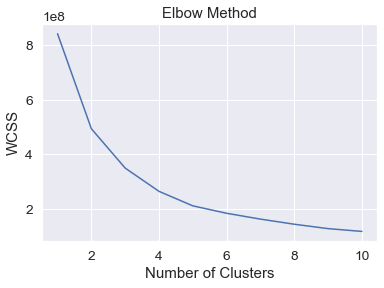

In [20]:
# finding out the proper number of clusters
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

In [21]:
# data preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [22]:
cluster_data[0]

array([  0.645,   0.445, -13.338,   1.   ,   0.451,   0.674,   0.744,
         0.151,   0.127, 104.851])

In [23]:
scaled = scaler.fit_transform(cluster_data)

In [25]:
X_new.describe()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Year
count,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,0.563594,0.542036,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,1988.566168
std,0.166103,0.251923,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,22.831283
min,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000
25%,0.453000,0.343000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,1974.000000
50%,0.577000,0.549000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,1992.000000
75%,0.686000,0.748000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,2007.000000
max,0.991000,1.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,2021.000000


In [26]:
import joblib 
joblib.dump(scaler, "scaler.pickle")

['scaler.pickle']

In [27]:
request_form = dict([('danceability', '50'), ('energy', '50'), ('loudness', '50'), ('mode', '1.0'),('speechiness', '50'), ('acousticness', '50'), ('instrumentalness', '50'), ('liveness', '50'), ('valence', '50'), ('tempo', '50'), ('date_min', '1992'), ('date_max', '2021')])
request_form

{'danceability': '50',
 'energy': '50',
 'loudness': '50',
 'mode': '1.0',
 'speechiness': '50',
 'acousticness': '50',
 'instrumentalness': '50',
 'liveness': '50',
 'valence': '50',
 'tempo': '50',
 'date_min': '1992',
 'date_max': '2021'}

In [28]:
model_input = []
for key, value in request_form.items():
    if key not in ('date_min', 'date_max'):
        if key in ('loudness', 'tempo'):
            model_input.append((float(value)))
        else:
            model_input.append(( float(value)/100.0))
            f
model_input = np.array(model_input)
print(model_input)

[5.e-01 5.e-01 5.e+01 1.e-02 5.e-01 5.e-01 5.e-01 5.e-01 5.e-01 5.e+01]


In [29]:
tracks_characteristics = tracks.drop(columns= ["Year"])
tracks_characteristics

,name,popularity,explicit,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Carve,6,0,['Uli'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851
1,Capítulo 2.16 - Banquero Anarquista,0,0,['Fernando Pessoa'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009
2,Vivo para Quererte - Remasterizado,0,0,['Ignacio Corsini'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418
3,El Prisionero - Remasterizado,0,0,['Ignacio Corsini'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980
4,Lady of the Evening,0,0,['Dick Haymes'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,云与海,50,0,['阿YueYue'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896
586668,blind,72,0,['ROLE MODEL'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091
586669,What They'll Say About Us,70,0,['FINNEAS'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095
586670,A Day At A Time,58,0,"['Gentle Bones', 'Clara Benin']",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029


In [30]:
tracks_characteristics_for_scale = X_new.drop(columns= "Year")

In [31]:
scaled_tracks = scaler.transform(tracks_characteristics_for_scale)

/Users/rebeccabland/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [36]:
# instantiating model
model = KMeans(n_clusters = 500, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = model.fit_predict(scaled)

In [37]:
model.predict(scaled_tracks)

array([341, 311,  69, ..., 168, 386, 445], dtype=int32)

In [38]:
tracks_characteristics["Cluster Number"] = model.predict(scaled_tracks)

In [39]:
tracks_characteristics

,name,popularity,explicit,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Cluster Number
0,Carve,6,0,['Uli'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,341
1,Capítulo 2.16 - Banquero Anarquista,0,0,['Fernando Pessoa'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,311
2,Vivo para Quererte - Remasterizado,0,0,['Ignacio Corsini'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,69
3,El Prisionero - Remasterizado,0,0,['Ignacio Corsini'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,15
4,Lady of the Evening,0,0,['Dick Haymes'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,云与海,50,0,['阿YueYue'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,240
586668,blind,72,0,['ROLE MODEL'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,330
586669,What They'll Say About Us,70,0,['FINNEAS'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,168
586670,A Day At A Time,58,0,"['Gentle Bones', 'Clara Benin']",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,386


In [43]:
tracks_characteristics.to_csv("final_track_clusters.csv")

In [40]:
scaler.transform([model_input])

array([[0.50454087, 0.5       , 1.68257465, 0.01      , 0.51493306,
        0.50200803, 0.5       , 0.5       , 0.5       , 0.20293773]])

In [41]:
date_range = (request_form['date_min'], request_form['date_max'])
date_range

('1992', '2021')

IndexError: boolean index did not match indexed array along dimension 0; dimension is 586672 but corresponding boolean dimension is 300

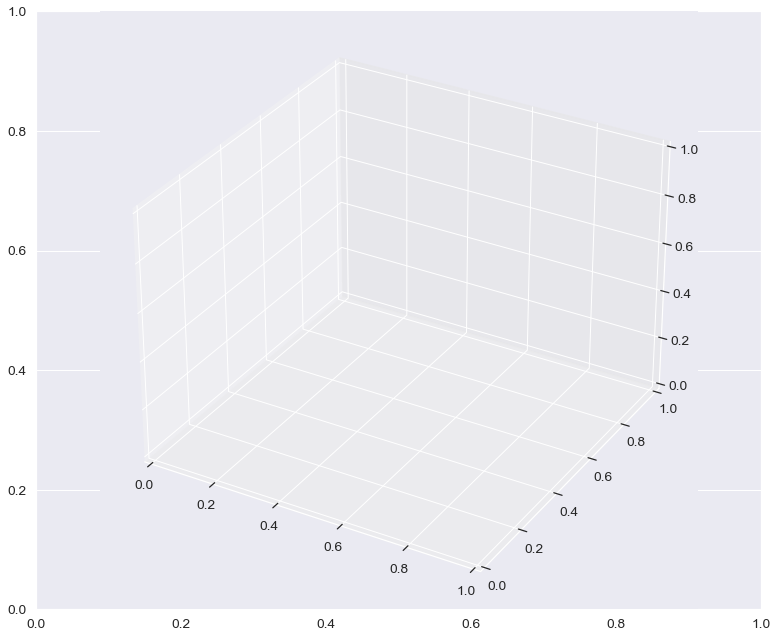

In [44]:
from mpl_toolkits.mplot3d import Axes3D
# visualizing clusters
fig, ax = plt.subplots(figsize=(13,11))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(scaled[y_kmeans[:300] == 0,0], scaled[y_kmeans[:300] == 0,1], s= 50, c= 'red',label= 'Cluster 1')
plt.scatter(scaled[y_kmeans[:300] == 1,0], scaled[y_kmeans[:300] == 1,1], s= 50, c= 'blue', label= 'Cluster 2')
plt.scatter(scaled[y_kmeans[:300] == 2,0], scaled[y_kmeans[:300] == 2,1], s= 50, c= 'green', label= 'Cluster 3')
plt.scatter(scaled[y_kmeans[:300] == 3,0], scaled[y_kmeans[:300] == 3,1], s= 50, c= 'cyan', label= 'Cluster 4')
plt.scatter(scaled[y_kmeans[:300] == 4,0], scaled[y_kmeans[:300] == 4,1], s= 50, c= 'magenta', label= 'Cluster 5')
# centroids[:300]
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s= 300, c= 'yellow', label= 'Centroids')
plt.title('Clusters')
plt.legend()
plt.savefig('clusters.png')
plt.show()

In [45]:
# predictions 
y_kmeans

array([341, 311,  69, ..., 168, 386, 445], dtype=int32)

In [46]:
# converting preditcions into a df
kmeans = pd.DataFrame(data=y_kmeans, dtype=int)
kmeans.columns = ['k_cluster']

# predictions as a df
print(kmeans.shape)
kmeans.head()

(586672, 1)


,k_cluster
0,341
1,311
2,69
3,15
4,56


In [47]:
# concatenating the cluster column to the dataframe
df_cluster = pd.concat([df_cluster, kmeans], axis=1)

# checking the dataframe
print(df_cluster.shape)
df_cluster.head()

(586672, 12)


,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Year,k_cluster
0,0.645,0.4450,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,1922,341
1,0.695,0.2630,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1922,311
2,0.434,0.1770,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,1922,69
3,0.321,0.0946,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,1922,15
4,0.402,0.1580,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,1922,56


In [48]:
# statistical distribution of the data in each column, for each cluster
#df_cluster.groupby("k_cluster").describe()

In [49]:
new_sample = (X_new.loc[586668]+.04).drop("Year")

In [50]:
import joblib

In [51]:
model.predict([new_sample])

array([310], dtype=int32)

In [52]:
joblib.dump(model, "cluster_model2.pickle")

['cluster_model2.pickle']

In [53]:
%store new_sample

Stored 'new_sample' (Series)


In [54]:
# cluster_data = df_cluster.iloc[:, [0,1,2,3,4,5,6,7,8,9,]].values

In [55]:
scaler = joblib.load("../../scaler.pickle")
model = joblib.load("../../cluster_model.pickle")

/Users/rebeccabland/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/rebeccabland/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator KMeans from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [58]:
scaler.clip = False
scaler

MinMaxScaler()

In [59]:
model

KMeans(n_clusters=500, random_state=0)

In [60]:
sample_test = [5.00e-01, 5.00e-01, 0.00e+00, 1.00e-02, 5.00e-01, 5.00e-01, 5.00e-01, 5.00e-01,
 5.00e-01, 1.75e+02]

In [61]:
sample_test_scaled = scaler.transform([sample_test])

In [62]:
model.predict(sample_test_scaled)

array([490], dtype=int32)

In [63]:
tracks_characteristics.loc[(tracks_characteristics["Cluster Number"]==230)
& (tracks_characteristics["popularity"]>40)]

,name,popularity,explicit,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Cluster Number
28499,(We're Gonna) Rock Around The Clock,64,0,['Bill Haley & His Comets'],1955-12-19,0.811,0.859,9,-6.317,1,0.1680,0.2050,0.000004,0.0761,0.784,90.686,230
48551,Love Is The Drug,62,0,['Roxy Music'],1975-10-01,0.838,0.757,2,-5.399,1,0.0927,0.0590,0.011900,0.0271,0.602,124.650,230
48995,Balinese - 2005 Remaster,42,0,['ZZ Top'],1975-04-18,0.771,0.799,9,-8.328,1,0.0339,0.1240,0.000016,0.0792,0.698,111.324,230
53711,Funkin' for Jamaica,52,0,['Tom Browne'],1980-02-01,0.822,0.854,8,-6.700,1,0.2370,0.1780,0.005740,0.0343,0.691,111.301,230
53765,Non l'hai mica capito - Remastered 2020,51,0,['Vasco Rossi'],1980,0.780,0.863,2,-5.826,1,0.1680,0.1720,0.000000,0.0568,0.596,134.769,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584737,TOP CLASS,53,1,"['Dree Low', 'P.J']",2019-11-12,0.830,0.691,7,-6.216,1,0.1260,0.1720,0.000000,0.0994,0.604,109.992,230
584751,How Will I Know,54,0,['Tusse'],2019-11-22,0.787,0.744,11,-4.731,1,0.0392,0.1200,0.000000,0.0531,0.673,117.510,230
584942,Sexcigg,59,1,['Lov1'],2020-05-01,0.812,0.686,10,-8.058,1,0.1550,0.0747,0.000000,0.1110,0.737,114.036,230
584966,PO PO PULL UP,57,1,"['Albin Myers', 'ODZ']",2020-02-21,0.868,0.843,1,-5.530,1,0.2260,0.0745,0.000003,0.0691,0.632,124.000,230


In [ ]:
purchase_data.loc[(purchase_data['SN'] == 'Lisosia93')|
                  (purchase_data['SN']=='Idastidru52')|
                  (purchase_data['SN']=='Chamjask73')|
                  (purchase_data['SN']=='Iral74')|
                  (purchase_data['SN']=='Iskadarya95')] 